In [75]:
import csv
import numpy as np
import pandas as pd

with open('./save/logs', 'r') as log_file:
    log_data = csv.reader(log_file)
    next(log_data)
    rewards = []
    episodes = []
    ep_lengths = []
    for row in log_data:
        episodes.append(int(row[0]))
        rewards.append(float(row[1]))
        ep_lengths.append(int(row[2]))
        
rewards = np.array(rewards)
ep_lengths = np.array(ep_lengths)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

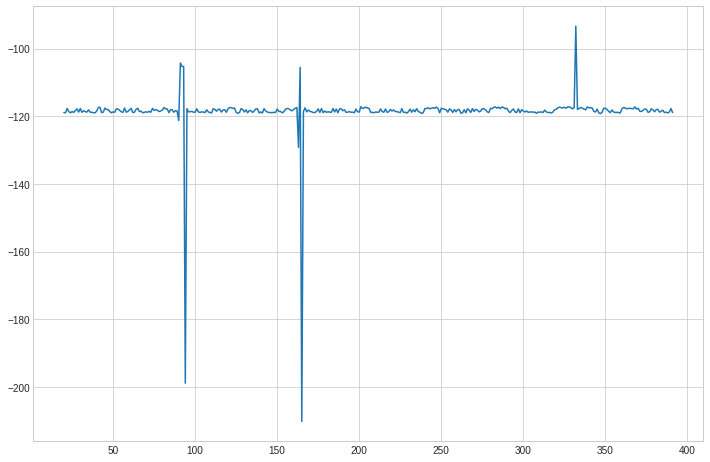

In [77]:
plt.plot(episodes[20:], rewards[20:])

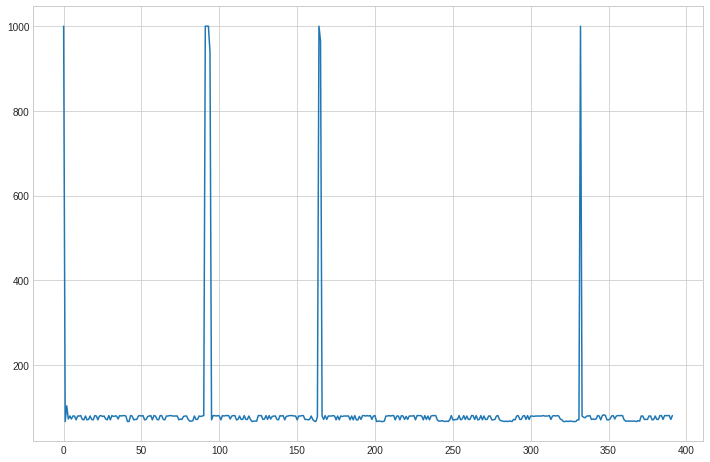

In [78]:
plt.plot(episodes, ep_lengths)

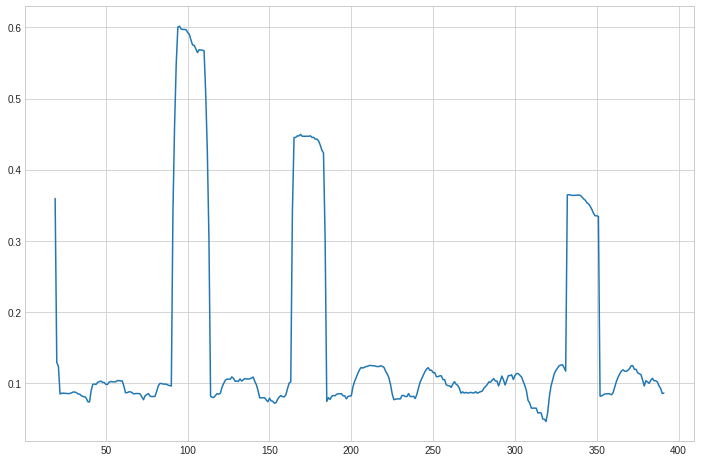

In [79]:
reward_series = pd.Series((rewards/ep_lengths)).rolling(20).std()
plt.plot(reward_series)